# Long Short-Term Memory Network

LSTM은 Backpropagation Through Time (BPTT)를 통해서 학습을 하며, vanishing gradient problem을 극복합니다.<br>
일반적인 Deep Learning에서 사용하는 Neurons들은 없고, layers들로 연결된 Memory Block을 갖고 있습니다. 

Block은 gates의 요소를 갖고 있으며, Gates는 block의 state를 관리하게 됩니다.<br>
일반적으로 다음과 같은 gates를 갖고 있습니다.

* Forget Gate: 어떤 정보를 버릴지 정합니다.
* Input Gate: Input 데이터에서 어떤 값들을 memory state에 업데이트할지 결정합니다.
* Output Gate: Input값과 memory block에 기초하여 어떤 결과값(output)을 낼지 결정합니다.


In [1]:
%pylab inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from IPython.display import display

np.random.seed(0) # fix the random number

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


## Data

International Airline Pessengers

In [2]:
# Load Data
data = pd.read_csv('../../data/time-series/international-airline-passengers.csv', 
                   names=['passenger'],
                   skiprows=1, usecols=[1])

# Normalize Data using Min-Max Scaler 
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
data = data.astype('float32')

# Seperate Train and Test Data
_size = int(len(data) * 0.7) # 144
train, test = data[:_size], data[_size:] # 100, 44

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        dataX.append(dataset[i])
        dataY.append(dataset[i+1][0])
    return np.array(dataX), np.array(dataY)

look_back = 1
train_x, train_y = create_dataset(train, look_back)
test_x, test_y = create_dataset(test, look_back)

train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, train_x.shape[1]))


## LSTM Network Model

In [3]:
model = Sequential(name='LSTM Model')
model.add(LSTM(output_dim=4, input_dim=1))
model.add(Dense(output_dim=1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_x, train_y, nb_epoch=100, batch_size=1, verbose=2)

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.unstack.
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.stack.
Epoch 1/100
1s - loss: 0.0555
Epoch 2/100
0s - loss: 0.0269
Epoch 3/100
0s - loss: 0.0194
Epoch 4/100
0s - loss: 0.0174
Epoch 5/100
0s - loss: 0.0161
Epoch 6/100
0s - loss: 0.0148
Epoch 7/100
0s - loss: 0.0136
Epoch 8/100
0s - loss: 0.0124
Epoch 9/100
0s - loss: 0.0111
Epoch 10/100
0s - loss: 0.0099
Epoch 11/100
0s - loss: 0.0087
Epoch 12/100
0s - loss: 0.0076
Epoch 13/100
0s - loss: 0.0065
Epoch 14/100
0s - loss: 0.0057
Epoch 15/100
0s - loss: 0.0048
Epoch 16/100
0s - loss: 0.0041
Epoch 17/100
0s - loss: 0.0035
Epoch 18/100
0s - loss: 0.0030
Epoch 19/100
0s - loss: 0.0027
Epoch 20/100
0s - loss: 0.0025
Epoch 21/100
0s - loss: 0.0023
Epoch 22/100
0s - loss: 0.0022
Epoch 23/100
0s - loss: 0.0022
Epoch 24/100
0s - loss: 0.0021
Epoch 25/100
0s - loss: 0.0021
Epoch 26/100
0s - lo

## Evaluate

In [4]:
train_predicted = scaler.inverse_transform(model.predict(train_x))
train_y = scaler.inverse_transform(train_y)
test_predicted = scaler.inverse_transform(model.predict(test_x))
test_y = scaler.inverse_transform(test_y)

train_predicted = train_predicted.reshape(train_predicted.shape[0])
test_predicted = test_predicted.reshape(test_predicted.shape[0])

train_score = np.sqrt(mean_squared_error(train_predicted, train_y))
test_score = np.sqrt(mean_squared_error(test_predicted, test_y))

data = scaler.inverse_transform(data)

print('Train RMSE:', train_score)
print('Test RMSE:', test_score)

Train RMSE: 23.1462
Test RMSE: 53.5707


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:374: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


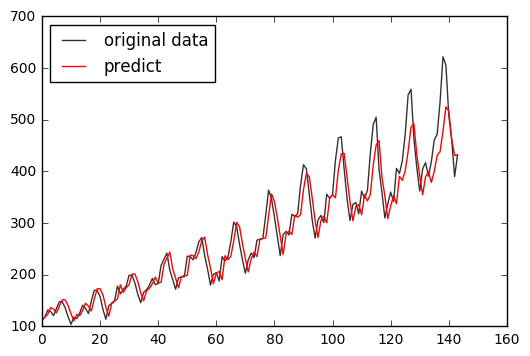

In [6]:
train_size = len(train_predicted)
test_size = len(test_predicted)
plot_data = np.empty_like(data)
plot_data = plot_data.reshape(plot_data.shape[0])
plot_data[look_back:train_size + look_back] = train_predicted.reshape(train_predicted.shape[0])
plot_data[train_size + look_back*2 + 1: len(data)-1] = test_predicted.reshape(test_predicted.shape[0])


train_predicted.shape
plot(data, color='#333333', label='original data')
plot(plot_data, color='red', label='predict')
legend(loc='upper left')